In [743]:
import numpy as np
import random

f_data = open("data/datasets-uci-breast-cancer-bin.csv", "r")
data = []
for line in f_data:
    line_tok = line.strip().split(",")
    x = [float(x) for x in line_tok[:-1]]
    y = line_tok[-1]
    data.append((x, y))
    
random.shuffle(data)

train_X, train_y = zip(*data[:170])
test_X, test_y = zip(*data[170:])

In [755]:
features = ["age='20-29'", "age='30-39'", "age='40-49'", "age='50-59'", "age='60-69'", "age='70-79'", 
            
            "meno='ge40'", "meno='lt40'", "meno='premeno'", 
            
            "tumor_size='0-4'", "tumor_size='10-14'", "tumor_size='15-19'", "tumor_size='20-24'", 
            "tumor_size='25-29'", "tumor_size='30-34'", "tumor_size='35-39'", "tumor_size='40-44'", 
            "tumor_size='45-49'", "tumor_size='50-54'", "tumor_size='5-9'", 
            
            "inv_nodes='0-2'", "inv_nodes='12-14'", "inv_nodes='15-17'", "inv_nodes='24-26'", 
            "inv_nodes='3-5'", "inv_nodes='6-8'", "inv_nodes='9-11'", 
            
            "encapsulated=nan", "encapsulated='no'", "encapsulated='yes'", 
            
            "degree_of_malignity='1'", "degree_of_malignity='2'", "degree_of_malignity='3'", 
            
            "breast='left'", "breast='right'", 
            
            "quadrant='central'", "quadrant='left_low'", "quadrant='left_up'", 
            "quadrant=nan", "quadrant='right_low'", "quadrant='right_up'", 
            
            "irradiat='no'", "irradiat='yes'"]

In [744]:
baseline = sum([1.0 for y in test_y if y == "'no-recurrence-events'"]) / len(test_y)
baseline

0.6982758620689655

## Metoda nejbližších sousedů

In [756]:
import sklearn.neighbors

model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=12)
model.fit(train_X, train_y)

train_acc = np.mean(model.predict(train_X) == train_y)
test_acc = np.mean(model.predict(test_X) == test_y)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.7529411764705882
test accuracy:     0.75


## Naivní Bayesův klasifikátor

In [753]:
import sklearn.naive_bayes

model = sklearn.naive_bayes.BernoulliNB()
model.fit(train_X, train_y)

train_acc = np.mean(model.predict(train_X) == train_y)
test_acc = np.mean(model.predict(test_X) == test_y)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.7529411764705882
test accuracy:     0.6896551724137931


## Perceptron

In [758]:
from sklearn.linear_model import Perceptron, SGDClassifier

#perceptron = Perceptron(n_iter=10).fit(train_X, train_y)
perceptron = SGDClassifier(loss='log', n_iter=1000, average=True, alpha=0.0001).fit(train_X, train_y)

train_acc = np.mean(perceptron.predict(train_X) == train_y)
test_acc = np.mean(perceptron.predict(test_X) == test_y)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.8058823529411765
test accuracy:     0.7155172413793104


In [759]:
for (name, val) in zip(features, perceptron.coef_[0]):
    print("{}\t=>\t{:2f}".format(name, 100 * val))

age='20-29'	=>	-199.044644
age='30-39'	=>	215.635893
age='40-49'	=>	86.199928
age='50-59'	=>	-6.084726
age='60-69'	=>	159.469696
age='70-79'	=>	-217.509945
meno='ge40'	=>	129.532115
meno='lt40'	=>	-290.976525
meno='premeno'	=>	200.110612
tumor_size='0-4'	=>	-327.594478
tumor_size='10-14'	=>	-201.517874
tumor_size='15-19'	=>	59.623444
tumor_size='20-24'	=>	121.127217
tumor_size='25-29'	=>	183.396056
tumor_size='30-34'	=>	140.051742
tumor_size='35-39'	=>	60.990805
tumor_size='40-44'	=>	89.031351
tumor_size='45-49'	=>	-69.314987
tumor_size='50-54'	=>	250.571269
tumor_size='5-9'	=>	-267.698343
inv_nodes='0-2'	=>	-153.907888
inv_nodes='12-14'	=>	-7.372099
inv_nodes='15-17'	=>	-98.856326
inv_nodes='24-26'	=>	204.778641
inv_nodes='3-5'	=>	-67.703953
inv_nodes='6-8'	=>	102.047438
inv_nodes='9-11'	=>	59.680389
encapsulated=nan	=>	-340.754734
encapsulated='no'	=>	134.132210
encapsulated='yes'	=>	245.288726
degree_of_malignity='1'	=>	25.370806
degree_of_malignity='2'	=>	-74.418010
degree_of_malig

## Rozhodovací strom

In [760]:
import sklearn.tree

tree = sklearn.tree.DecisionTreeClassifier(max_depth=3)
tree.fit(train_X, train_y)

train_acc = np.mean(tree.predict(train_X) == train_y)
test_acc = np.mean(tree.predict(test_X) == test_y)
    
print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.7764705882352941
test accuracy:     0.7327586206896551


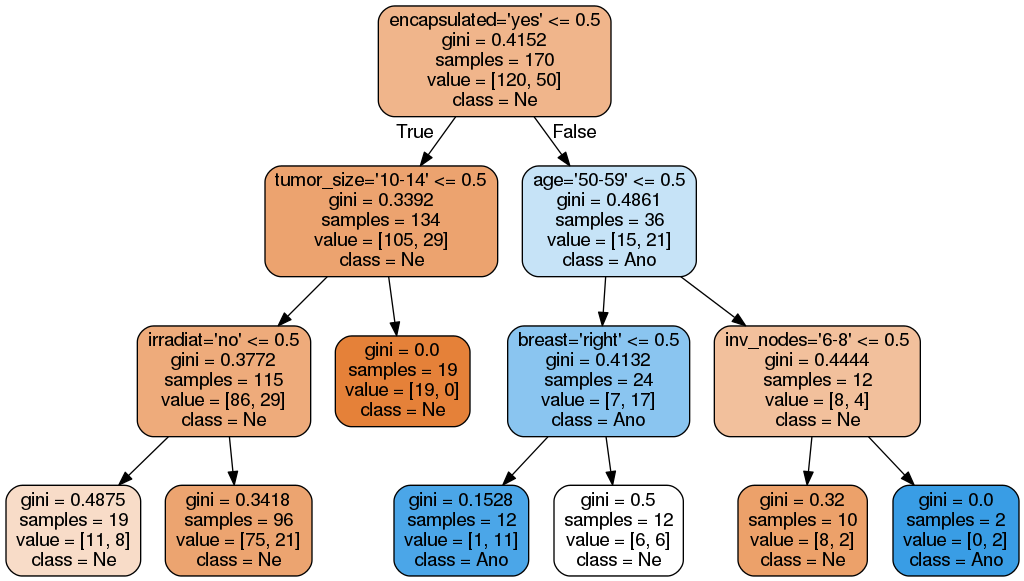

In [769]:
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
sklearn.tree.export_graphviz(tree, out_file=dot_data,
                         feature_names=features, 
                         class_names=["Ne", "Ano"], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

## Rozhodovací les

In [762]:
import sklearn.ensemble

forest = sklearn.ensemble.RandomForestClassifier(n_estimators=10, max_depth=7)
forest.fit(train_X, train_y)

train_acc = np.mean(forest.predict(train_X) == train_y)
test_acc = np.mean(forest.predict(test_X) == test_y)

print("training accuracy: {}".format(train_acc))
print("test accuracy:     {}".format(test_acc))

training accuracy: 0.9235294117647059
test accuracy:     0.7586206896551724
